# Advanced Lecture \#1: Incremental Path Planning

In this problem set...



Import the modules needed for this problem set.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%pylab inline

from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
from world import World

Import the classes needed for this problem set.

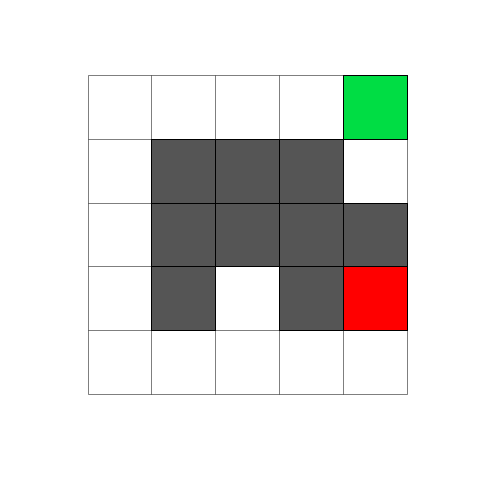

In [2]:
from grid import Grid
# Test drawing a grid with lots of cool stuff...

grid_str = """0 0 0 0 S
              0 1 1 1 0
              0 1 1 1 1
              0 1 0 1 G
              0 0 0 0 0"""
grid = Grid.create_from_str(grid_str)


graph = grid.to_graph()

#graph.draw()
grid.draw()



#isp = IncrementalSearchProblem(world, 3, 6)
#isp.draw_state(grid)



In [3]:
# Create grid from text.
# 1: obstacle, 0: free region
# Modify the text to create your own grid
# Ensure that the number of columns is constant!
grid_str = """0 1 1 1 1 1
              0 1 0 0 0 0
              0 1 0 1 1 0
              0 1 0 0 1 0
              0 1 1 1 1 0
              0 0 0 0 0 0"""
test_grid = Grid.create_from_str(grid_str)

# Access the grid elements
print "Num cols, num rows: ", test_grid.size
print "(2,1) is obstacle?", test_grid.grid_array[2,1] > 0
print "(0,0) is obstacle?", test_grid.grid_array[0,0] > 0
print "Cell size: ", test_grid.cell_size

# Drawing functions
# Draw the grid
# axes = test_grid.draw()
# # Draw a circle in cell (5,2) [col 5, row 2]
# test_grid.draw_cell_circle(axes, (5,2),color='black')
# # You can draw some paths, too
# test_grid.draw_path(axes, [(0,0), (1,0), (2,0)], color='blue')
# test_grid.draw_path(axes, [(2,4), (2,3), (2,2), (3,2)], color='magenta')

Num cols, num rows:  (6, 6)
(2,1) is obstacle? True
(0,0) is obstacle? False
Cell size:  (1.0, 1.0)


In [6]:
# Test updating World...

from grid import *

grid_str = """0 0 0 0 S
              0 0 1 1 0
              0 1 1 1 1
              0 1 0 1 G
              0 0 0 0 0"""
_grid = Grid.create_from_str(grid_str)

world = World(_grid, (0, 4), vision_radius=2)
world.draw(ground_truth=False)
# World.draw_grid(world._grid_ground_truth, (0, 3))
# world._grid_ground_truth.draw()
# world.belief_grid.draw()

new_graph = world.update_world((1,3))
# world._grid_ground_truth.draw()
# world.belief_grid.draw()

new2_graph = world.update_world((0,2))
# world._grid_ground_truth.draw()
# world.belief_grid.draw()



#grid = Grid(num_cols=100, num_rows=100)
#world = World(grid, (50, 50), vision_radius=10)


ValueError: Invalid time. You supplied time=21. Time must be non-negative and no more than the current time t=0